# Speaker recognition 

Import Libraries

In [31]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import sklearn.model_selection as sk
import glob
import os
import sounddevice as sd
import librosa
import librosa.display
from scipy.io.wavfile import write
from scipy.io.wavfile import read
import matplotlib.pyplot as plt


Parameters

In [32]:
fs = 44100
no_mfcc=20



Record speaker

In [45]:
seconds = 3 
no_rec=30
person="2"
emotion="angry"

In [44]:
filename="voice_"+person+"_"+str(no_rec)+"_"+emotion+".wav"
recording = sd.rec(int(seconds * fs), samplerate=fs, channels=1)



sd.wait() 
write(filename, fs, recording)
no_rec=no_rec+1

Load files. Extract features

In [11]:
x=[]
y1 =[]
y2=[]
for file in glob.glob("C:\\Users\\tmacovei001\\Desktop\\Speaker Recognition\\Datasets\\Custom\\All\\*"):
    basename=os.path.basename(file)
    pers=basename.split("_")[1]
    if(pers=="theo"):
        pers=0
    elif(pers=="andreea"):
        pers=1
    elif(pers=="ioana"):
        pers=2
    y1.append(pers)
    file_temp,fs_temp=librosa.load(file, sr=fs)
    mfcc_features=librosa.feature.mfcc(file_temp,sr=fs, S=None, n_mfcc=no_mfcc)
    x.append(mfcc_features)
    emotion=basename.split("_")[3]
    emotion=emotion.split(".")[0]
    if(emotion=="neutral"):
        emotion=0
    elif(emotion=="happy"):
        emotion=1
    elif(emotion=="angry"):
        emotion=2    
    y2.append(emotion)
   


In [12]:
x=np.array(x)
y1=np.array(y1)
y2=np.array(y2)



##Diverse plotari cu diversi mfcc, param

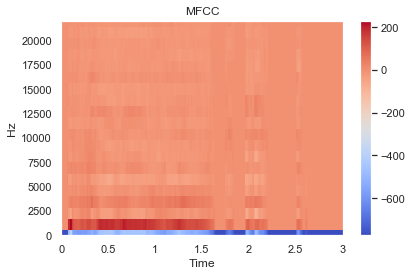

In [13]:
librosa.display.specshow(x[18],x_axis='time',y_axis='linear',sr=fs)
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

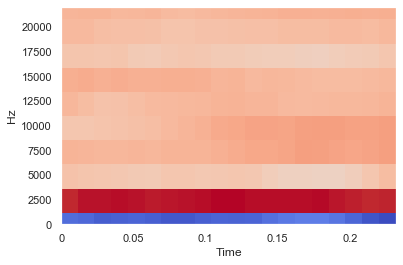

In [14]:
t=file_temp
#plt.plot(t)
t=t[60000:70000]
#plt.plot(t)
#plt.specgram(t,Fs=fs)
mfcc_features=librosa.feature.mfcc(y=t,sr=fs, S=None, n_mfcc=10)
librosa.display.specshow(mfcc_features,x_axis='time',y_axis='linear',sr=fs)

Plot sound and FFT

In [15]:
file="C:\\Users\\tmacovei001\\Desktop\\Speaker Recognition\\Datasets\\Custom\\All\\voice_1_0_neutral.wav"
file_temp,fs_temp=librosa.load(file, sr=fs)

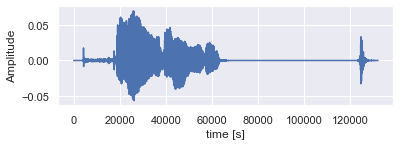

In [16]:
plt.figure(1)
fig11 = plt.subplot(211)
fig11.set_xlabel('time [s]')
fig11.set_ylabel('Amplitude')
plt.plot(file_temp)





In [ ]:
plt.plot(file_temp)

(array([[2.37318282e-15, 2.71878934e-16, 7.84024067e-15, ...,
         3.02522501e-15, 1.29626502e-16, 1.69489685e-13],
        [1.98309075e-14, 3.10035197e-15, 1.05159432e-14, ...,
         4.80738953e-15, 1.05184458e-15, 4.93636586e-13],
        [1.63179855e-14, 1.23822267e-14, 1.98328994e-15, ...,
         3.35802607e-15, 5.65794658e-15, 3.72317536e-13],
        ...,
        [1.27428796e-14, 1.94216490e-14, 7.08373486e-14, ...,
         3.72514297e-15, 1.93004049e-15, 1.23103343e-14],
        [1.03467513e-14, 1.16897932e-15, 4.84090170e-14, ...,
         1.72634464e-15, 7.87466020e-16, 4.41585635e-15],
        [2.64950372e-15, 7.91848971e-16, 9.68260965e-15, ...,
         3.46556426e-17, 1.62457209e-17, 1.80477026e-17]]),
 array([    0.      ,   172.265625,   344.53125 ,   516.796875,
          689.0625  ,   861.328125,  1033.59375 ,  1205.859375,
         1378.125   ,  1550.390625,  1722.65625 ,  1894.921875,
         2067.1875  ,  2239.453125,  2411.71875 ,  2583.984375,
         

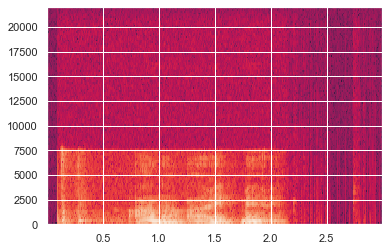

In [27]:
plt.specgram(file_temp,Fs=fs)
#+psd

TODO: Process

Extract the features

In [ ]:
for i in (0,len(x)-1):
    plt.figure()
    librosa.display.specshow(x[i])
    plt.colorbar()
    plt.title('MFCC')
    plt.tight_layout()
    plt.show()


In [ ]:
librosa.display.specshow(x[4])

In [ ]:
#Note that mfcc operation returns (n_mfcc, time). 
#You have to do an axis permutation to get it to (time, n_mfcc) format. 
#So that the convolution happens on the time dimension.

In [ ]:
##Normalize!!

Model

Model parameters

In [12]:
no_classes=3
nb_filter1=16
nb_filter2=8
nb_filter3=4
no_channels=1
filter_length=3
filter_length2=2
length=39
x_reshape=(x.shape[0],no_mfcc,x.shape[2],no_channels)
input_shape=(no_mfcc,x.shape[2],no_channels)

Create model

In [16]:
x = x.reshape(x_reshape)

x_train, x_test, y1_train, y1_test = sk.train_test_split(x,y1,test_size=0.33, random_state = 42)
y1_train = tf.keras.utils.to_categorical(y1_train,num_classes=no_classes)
y1_test = tf.keras.utils.to_categorical(y1_test,num_classes=no_classes)

ValueError: too many values to unpack (expected 2)

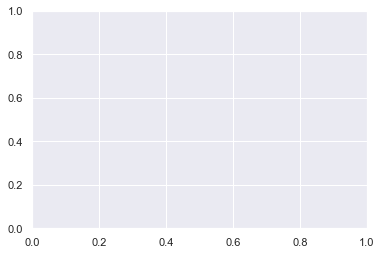

In [17]:
librosa.display.specshow(x[10],x_axis='time',y_axis='linear',sr=fs)


In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(3, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 19, 258, 32)       160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 129, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 37152)             0         
_________________________________________________________________
dense (Dense)                (None, 3)                 111459    
Total params: 111,619
Trainable params: 111,619
Non-trainable params: 0
_________________________________________________________________


Compile model

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])


Train model

In [21]:
history = model.fit(x_train, y1_train, epochs=100,verbose=1, validation_data=(x_test,y1_test))

Train on 33 samples, validate on 17 samples
Epoch 1/100
33/33 [==============================] - 1s 16ms/sample - loss: 33.1635 - accuracy: 0.4848 - val_loss: 268.0088 - val_accuracy: 0.4706
Epoch 2/100
33/33 [==============================] - 0s 2ms/sample - loss: 299.6164 - accuracy: 0.3636 - val_loss: 351.5014 - val_accuracy: 0.1176
Epoch 3/100
33/33 [==============================] - 0s 1ms/sample - loss: 342.9004 - accuracy: 0.1818 - val_loss: 101.3806 - val_accuracy: 0.4706
Epoch 4/100
33/33 [==============================] - 0s 2ms/sample - loss: 112.9573 - accuracy: 0.3636 - val_loss: 64.4722 - val_accuracy: 0.4118
Epoch 5/100
33/33 [==============================] - 0s 2ms/sample - loss: 70.5163 - accuracy: 0.4545 - val_loss: 131.6766 - val_accuracy: 0.4118
Epoch 6/100
33/33 [==============================] - 0s 2ms/sample - loss: 129.3093 - accuracy: 0.4545 - val_loss: 84.5463 - val_accuracy: 0.4118
Epoch 7/100
33/33 [==============================] - 0s 2ms/sample - loss: 85

Evaluate model

In [34]:
tf.keras.metrics.Accuracy(
    name='accuracy', dtype=None
)

In [90]:
file="C:\\Users\\tmacovei001\\Speaker Recognition\\voice_andreea_0_angry.wav"